In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

from typing import Dict, Tuple

import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('ansel/transfer_data.csv', sep=",")

In [3]:
data.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15
3,Ronaldo,Pre-Season,NaN,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
4,Gonzalo Higuain,Pre-Season,Attacker,Argentina,Napoli,Juventus,Sold,90000000.0,Serie A,16/17


In [4]:
clean_data=data.copy()
index_with_nan = clean_data.index[clean_data.isnull().any(axis=1)]
clean_data.drop(index_with_nan,0, inplace=True)
clean_data.isnull().sum()

PLAYER         0
WINDOW         0
POSITION       0
COUNTRY        0
FROM           0
TO             0
DESCRIPTION    0
PRICE          0
LEAGUE         0
SEASON         0
dtype: int64

In [6]:
bad_data=data.copy()
index_with_nan = bad_data.index[~bad_data.isnull().any(axis=1)]
bad_data.drop(index_with_nan,0, inplace=True)
bad_data.isnull().sum()

PLAYER            1
WINDOW            1
POSITION       1128
COUNTRY         826
FROM              2
TO                1
DESCRIPTION       1
PRICE             1
LEAGUE            1
SEASON            1
dtype: int64

In [7]:
bad_data.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
3,Ronaldo,Pre-Season,NaN,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
9,Zlatan Ibrahimovic,Pre-Season,NaN,NaN,Inter Milan,Barcelona,Sold,69000000.0,La Liga,09/10
10,Kaka,Pre-Season,NaN,NaN,AC Milan,Real Madrid,Sold,68400000.0,La Liga,09/10
14,Fernando Torres,Mid-Season,NaN,Spain,Liverpool,Chelsea,Sold,58400000.0,EPL,10/11
29,Juan Mata,Mid-Season,NaN,Spain,Chelsea,Manchester United,Sold,44700000.0,EPL,13/14


In [14]:
test_data = bad_data[bad_data['TO'].notna()]

test_data.isnull().sum()

PLAYER            0
WINDOW            0
POSITION       1127
COUNTRY         825
FROM              1
TO                0
DESCRIPTION       0
PRICE             0
LEAGUE            0
SEASON            0
dtype: int64

Будем пытаться угадать позицию по позициям игроков в ближайшем ценовом диапазоне

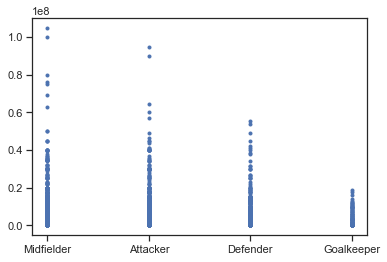

In [27]:
plt.plot(clean_data['POSITION'], clean_data['PRICE'], 'b.')#, \
#          test_data['SEASON'], test_data['PRICE'], 'ro')
plt.show() 

In [30]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)

In [75]:
KNeighborsClassifierObj.fit(clean_data[['PRICE']], clean_data['POSITION'])
predict=KNeighborsClassifierObj.predict(test_data[['PRICE']])

In [76]:
len(predict)
test_data.shape

(1127, 10)

In [77]:
count=0
for ind,val in test_data.iterrows():
    test_data['POSITION'][ind]=predict[count]
    count+=1

D:\PyML\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\PyML\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [78]:
test_data.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
3,Ronaldo,Pre-Season,Attacker,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
9,Zlatan Ibrahimovic,Pre-Season,Midfielder,NaN,Inter Milan,Barcelona,Sold,69000000.0,La Liga,09/10
10,Kaka,Pre-Season,Midfielder,NaN,AC Milan,Real Madrid,Sold,68400000.0,La Liga,09/10
14,Fernando Torres,Mid-Season,Attacker,Spain,Liverpool,Chelsea,Sold,58400000.0,EPL,10/11
29,Juan Mata,Mid-Season,Midfielder,Spain,Chelsea,Manchester United,Sold,44700000.0,EPL,13/14


In [79]:
test_data.isnull().sum()

PLAYER           0
WINDOW           0
POSITION         0
COUNTRY        825
FROM             1
TO               0
DESCRIPTION      0
PRICE            0
LEAGUE           0
SEASON           0
dtype: int64

Все нулевые позиции исчезли!

In [80]:
clean_data.isnull().sum()

PLAYER         0
WINDOW         0
POSITION       0
COUNTRY        0
FROM           0
TO             0
DESCRIPTION    0
PRICE          0
LEAGUE         0
SEASON         0
dtype: int64

In [81]:
Kmeth = KNeighborsClassifier(n_neighbors=5)
Kmeth.fit(clean_data[['PRICE']], clean_data['POSITION'])
predict=Kmeth.predict(clean_data[['PRICE']])
accuracy_score(clean_data['POSITION'],predict)

0.3303973380309258

In [82]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [83]:
print_accuracy_score_for_classes(clean_data['POSITION'],predict)


Метка 	 Accuracy
Attacker 	 0.1197954711468225
Defender 	 0.8608108108108108
Goalkeeper 	 0.00267379679144385
Midfielder 	 0.1320254506892895


In [88]:
short_data = clean_data.drop(clean_data[(clean_data['POSITION'] == 'Goalkeeper')].index)

In [113]:
K2 = KNeighborsClassifier(n_neighbors=3)
K2.fit(short_data[['PRICE']], short_data['POSITION'])
predict2=K2.predict(short_data[['PRICE']])
accuracy_score(short_data['POSITION'],predict2)

0.40021119324181625

In [114]:
print_accuracy_score_for_classes(short_data['POSITION'],predict2)

Метка 	 Accuracy
Attacker 	 0.17384952520087654
Defender 	 0.10878378378378378
Midfielder 	 0.7932131495227995


In [118]:
clean_data.groupby(['POSITION']).count()

,PLAYER,WINDOW,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
POSITION,,,,,,,,,
Attacker,1369,1369,1369,1369,1369,1369,1369,1369,1369
Defender,1480,1480,1480,1480,1480,1480,1480,1480,1480
Goalkeeper,374,374,374,374,374,374,374,374,374
Midfielder,1886,1886,1886,1886,1886,1886,1886,1886,1886


In [120]:
def regr_to_class(y: str) -> float:
    if y == 'Midfielder':
        result = 2
    elif y == 'Defender':
        result = 1
    elif y == 'Attacker':
        result = 3
    else:
        result = 4        
    return result 

In [121]:
clean_data['pos_val'] = \
clean_data.apply(lambda row: regr_to_class(row['POSITION']),axis=1)

In [122]:
clean_data.head()

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON,pos_val
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17,2
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14,2
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15,3
4,Gonzalo Higuain,Pre-Season,Attacker,Argentina,Napoli,Juventus,Sold,90000000.0,Serie A,16/17,3
5,James Rodriguez,Pre-Season,Midfielder,Colombia,Monaco,Real Madrid,Sold,80000000.0,La Liga,14/15,2


In [123]:
clean_data.corr()

,PRICE,pos_val
PRICE,1.000000,0.022717
pos_val,0.022717,1.000000


In [124]:
best_score=0
best_neig=0
for neigb in range(21):
    K3 = KNeighborsClassifier(n_neighbors=neigb+1)
    K3.fit(short_data[['PRICE']], short_data['POSITION'])
    predict3=K3.predict(short_data[['PRICE']])
    acs=accuracy_score(short_data['POSITION'],predict3)
    if  acs> best_score:
        best_score=acs
        best_neig=neigb+1
print(best_neig,':',best_score)
    

12 : 0.4063357972544879


Итак, мы пытались установить зависимость между позицией игрока и ценой,за которую был совершен его трансфер.Первоначально мы разделили наши данные на две части: позиция присутсвует ,а во второй отсутсвует.Обучившись на первой выборке мы заполнили пустые значения во второй.Но проведя множество анализов, мы выяснили , что хоть и влияние определнно имеется, но оно не столь значимо ,чтоб можно было только по цену судить о позиции.Мы заметили, что вратарей в выборке изначально мало, так что убрали их и произвели подборку лучшего результата и лучшего количества соседей.Но результаты говорят,что мы угадываем примерно 4 из 10 игроков , что ,конечно,  не полный провал , но и явно не успех.Необходимы дальнейшие исследования и  более богатая выборка.